In [2]:
#imports
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
from moviepy.editor import VideoFileClip

In [6]:
#extract frames
video_path = "vid2.mp4"
c= cv2.VideoCapture(video_path)

output = "output_frames"
if not os.path.exists(output):
    os.makedirs(output)


count = 0


while c.isOpened():

    ret, frame = c.read()

    if ret:

        frame_path = os.path.join(output, f"frame_{count:05d}.jpg")
        cv2.imwrite(frame_path, frame)
        count += 1
    else:
        break


c.release()

print(f"Extracted" ,count ,"frames.")
#all the video frames are extracted here

Extracted 266 frames.


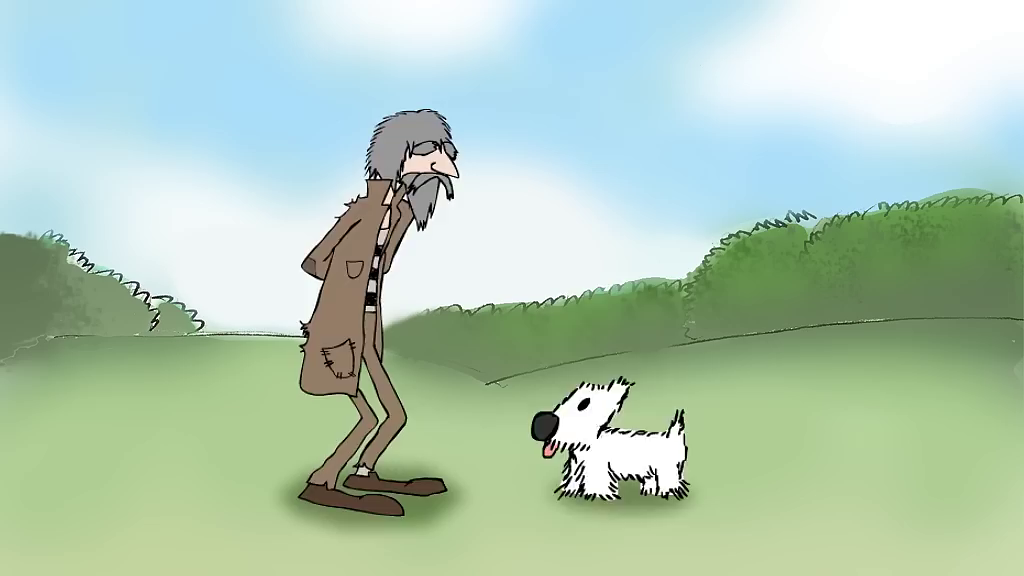

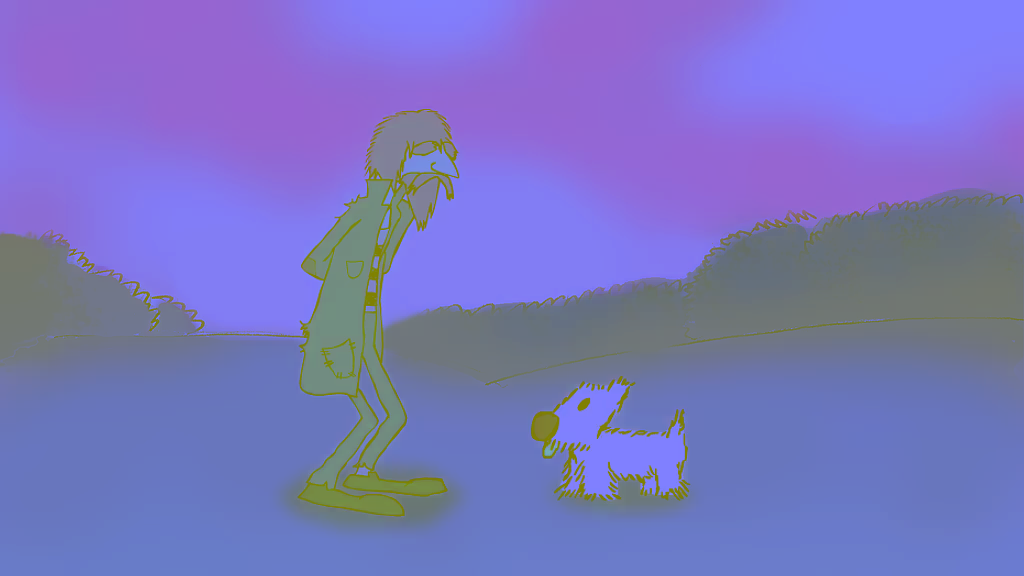

In [22]:
# Convert frame from RGB to YCbCr colorspace.
video_path = "vid2.mp4"
cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()

if ret:
    cv2_imshow(frame)
    ycbcr_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    cv2_imshow( ycbcr_frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    file = "ycbrimage.jpg"


    cv2.imwrite( file,ycbcr_frame)

cap.release()


y component


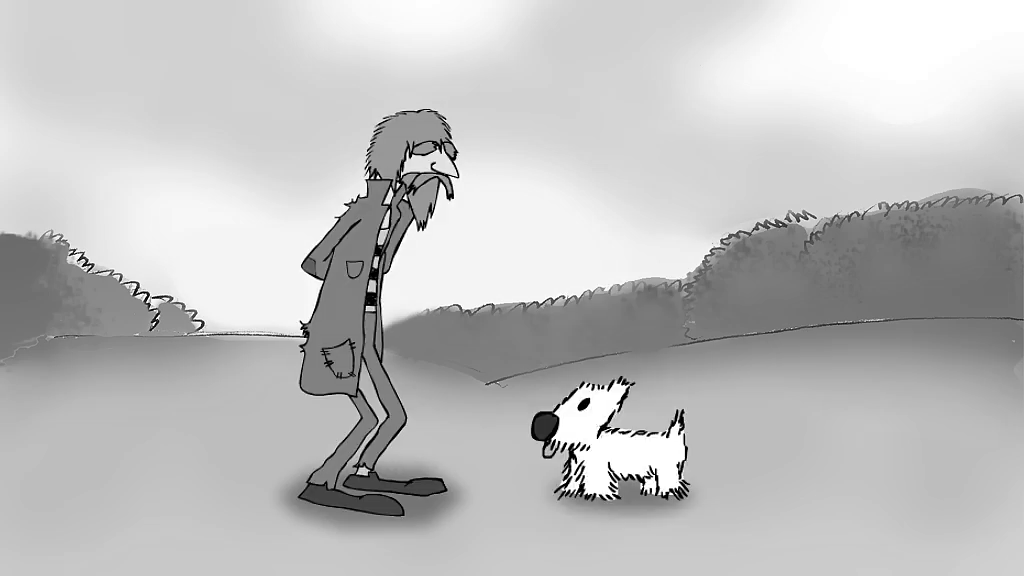

cb component


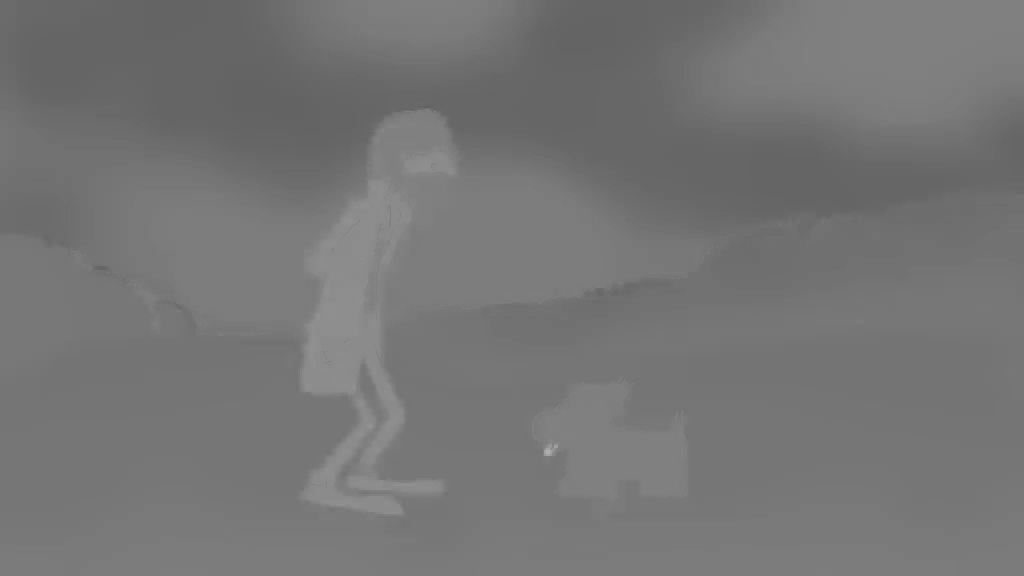

cr compoonent


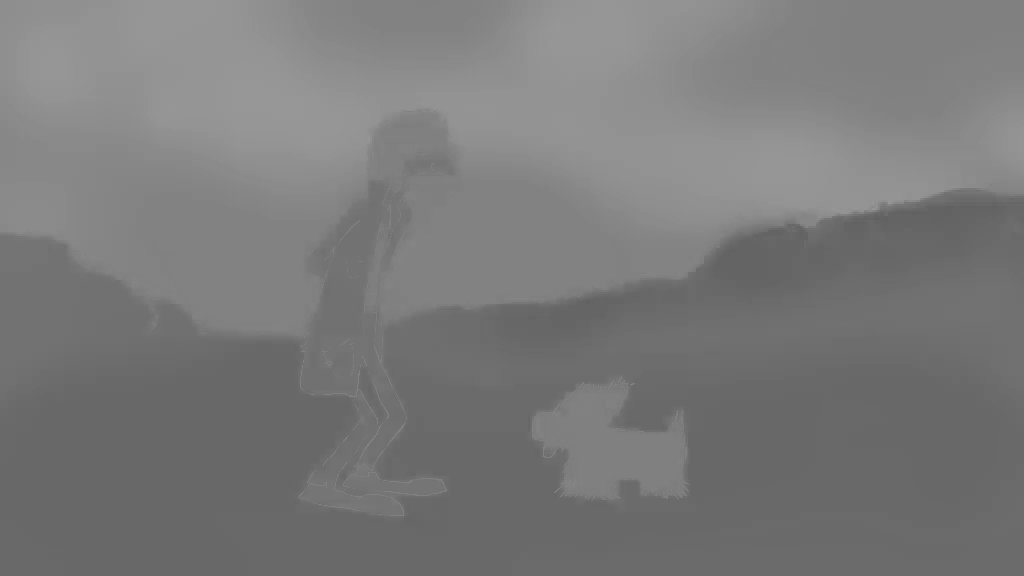

In [12]:
#Display the three components of the image in three separate images.
if ret:
    ycbcr_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)


    Y, Cb, Cr = cv2.split(ycbcr_frame)


    print('y component')
    cv2_imshow(Y)
    print('cb component')
    cv2_imshow( Cb)
    print('cr compoonent')
    cv2_imshow( Cr)

    cv2.waitKey(0)
    cv2.destroyAllWindows()



y componenet


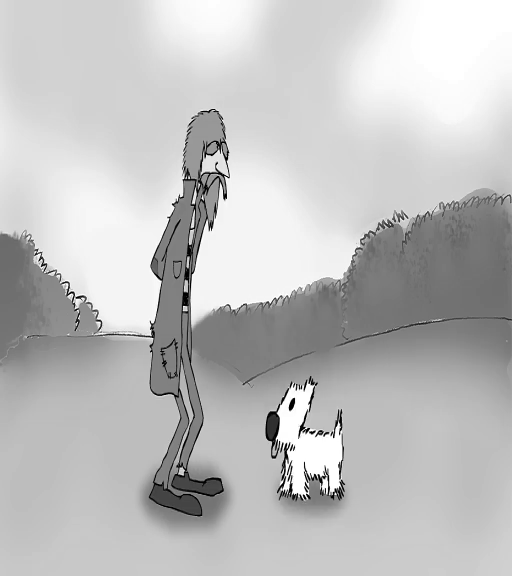

cb component


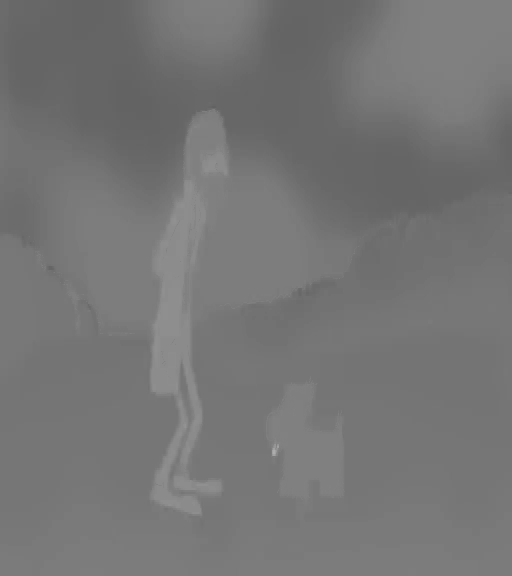

cr component


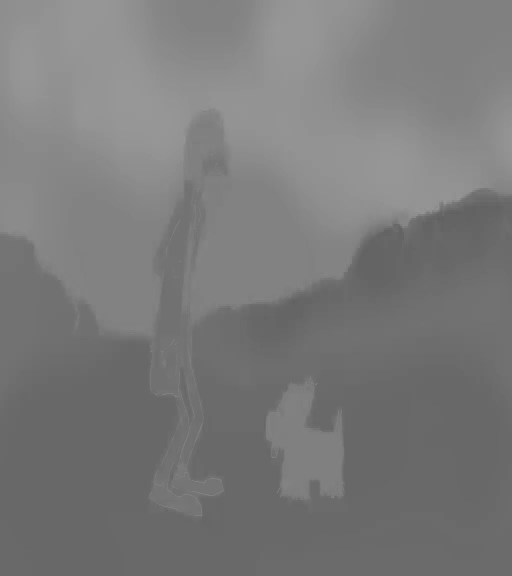

In [13]:
#Apply a 4:2:2 subsampling to the YCbCr components above.
if ret:
    ycbcr_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)


    Y, Cb, Cr = cv2.split(ycbcr_frame)


    Cb_subsampled = cv2.resize(Cb, (int(Cb.shape[1] / 2), Cb.shape[0]), interpolation=cv2.INTER_LINEAR)
    Cr_subsampled = cv2.resize(Cr, (int(Cr.shape[1] / 2), Cr.shape[0]), interpolation=cv2.INTER_LINEAR)


    Y_resized = cv2.resize(Y, (Cb_subsampled.shape[1], Cb_subsampled.shape[0]), interpolation=cv2.INTER_LINEAR)



    # Display each component in a separate window
    print("y componenet")
    cv2_imshow( Y_resized)
    print("cb component")
    cv2_imshow( Cb_subsampled)
    print("cr component")
    cv2_imshow( Cr_subsampled)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

cap.release()

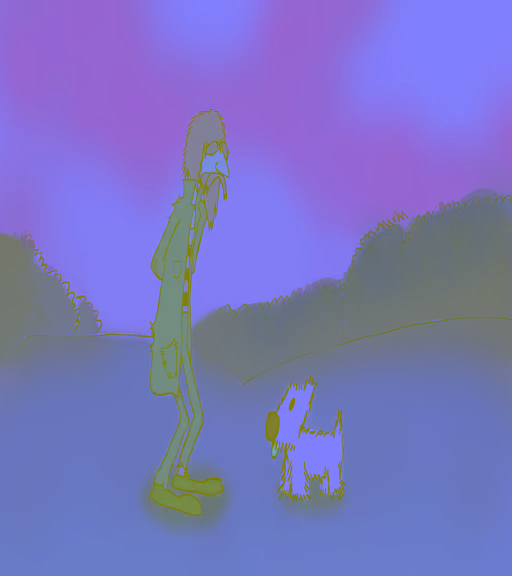

True

In [24]:
#merge all subsamples together,display the subsampled picture
Cb_subsampled = cv2.resize(Cb, (int(Cb.shape[1] / 2), Cb.shape[0]), interpolation=cv2.INTER_LINEAR)
Cr_subsampled = cv2.resize(Cr, (int(Cr.shape[1] / 2), Cr.shape[0]), interpolation=cv2.INTER_LINEAR)


Y_resized = cv2.resize(Y, (Cb_subsampled.shape[1], Cb_subsampled.shape[0]), interpolation=cv2.INTER_LINEAR)
compressed_frame = cv2.merge([Y_resized, Cb_subsampled, Cr_subsampled])
cv2_imshow( compressed_frame)
out = "compressed.jpg"


cv2.imwrite( out,ycbcr_frame)



What are the resolutions of each of the three components before and after subsampling? (Add
your calculations and comments as a text in your google colab/jupyter notebook) **bold text**
original_width = 1024
original_height = 576

Before subsampling:

Y component: The resolution is the same as the original frame.

Cb and Cr components: These components have half the width (horizontal resolution) of the Y component.


After 4:2:2 subsampling:

 The widthis halved compared to the original frame.


subsampling_width = original_width // 2

subsampling_height = original_height *italicised text*



In [15]:
original_resolution = (Y.shape[1], Y.shape[0])
subsampled_resolution = (Y_resized.shape[1], Y_resized.shape[0])  # Y component remains unchanged
subsampled_resolution_cbcr = (Cb_subsampled.shape[1], Cb_subsampled.shape[0])
original_resolution_cbcr = (Cb.shape[1], Cb.shape[0])
print("Original Resolution (Y):", original_resolution)
print("original cbcr",original_resolution_cbcr)
print("Subsampled Resolution (Y):", subsampled_resolution)
print("Subsampled Resolution (Cb, Cr):", subsampled_resolution_cbcr)





Original Resolution (Y): (1024, 576)
original cbcr (1024, 576)
Subsampled Resolution (Y): (512, 576)
Subsampled Resolution (Cb, Cr): (512, 576)


In [19]:


#Motion Detection
cap = cv2.VideoCapture("vid2.mp4")


width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("detected motion.mp4", fourcc, fps, (width, height), isColor=False)


ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

while True:

    ret, frame = cap.read()
    if not ret:
        break


    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


    frame_diff = cv2.absdiff(prev_gray, gray)


    _, thresh = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)


    if cv2.countNonZero(thresh) > 0:

        out.write(thresh)


    prev_gray = gray.copy()


cap.release()
out.release()



**motion detection**
the pixels of any dtetcted movement are brighter and the values of all pixels get changed
no movement:darker pixels
movement: white bright pixels


In [20]:
outputaudio = "audio.wav"

try:
    clip = VideoFileClip(video_path)
    audio = clip.audio
    audio.write_audiofile(outputaudio)

except Exception as e:
    print("Error:", e)

MoviePy - Writing audio in audio.wav


MoviePy - Done.


**2.2 audio filtering**
i used the fade in effect in the twister website ,this effect changed the amplitude of an audio so that the audi started witha lower ampluitude (almost none) and it started increasing gradually till the end of the audio
